# **1. Project Overview**
### Title: Predicting Outcome Gaps in K-12 Public Schools
- **Objective**: Analyze how funding disparities and poverty levels impact student performance gaps (Outcome Gap).
- **Dataset**: Filtered data from Arizona and Maine school districts.
- **Tools**: Python (Pandas, Scikit-learn, Matplotlib, Seaborn).
- **Model**: Linear Regression to predict `Outcome_Gap` based on:
  - `Actual_Spending`
  - `Funding_Gap`
  - `Poverty_Rate`
  


# **2. Data Preparation**
### Key Steps:
- Checked for missing values and addressed them using mean imputation for consistency.
- Selected features: `Actual_Spending`, `Funding_Gap`, `Poverty_Rate`.
- Split data into training (70%) and testing (30%) sets.

In [604]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [606]:
data = pd.read_csv('./maine_arizona_filtered.csv')

In [608]:
# Select relevant variables
selected_columns = [
    'year', 'district', 'state_name', 'ppcstot', 'predcost', 
    'fundinggap', 'outcomegap', 'enroll', 'pov'
]
df = data[selected_columns].copy()

# Rename columns for clarity
df.rename(columns={
    'year': 'Year',
    'district': 'District',
    'state_name': 'State',
    'ppcstot': 'Actual_Spending',
    'predcost': 'Required_Spending',
    'fundinggap': 'Funding_Gap',
    'outcomegap': 'Outcome_Gap',
    'enroll': 'Enrollment',
    'pov': 'Poverty_Rate'
}, inplace=True)

In [610]:
# Fill missing values in Outcome_Gap with the mean for each state
df['Outcome_Gap'] = df.groupby('State')['Outcome_Gap'].transform(
    lambda x: x.fillna(x.mean())
)

In [612]:
correlation_matrix = df[[
    'Actual_Spending', 'Required_Spending', 'Funding_Gap', 'Enrollment', 
    'Poverty_Rate', 'Outcome_Gap'
]].corr()

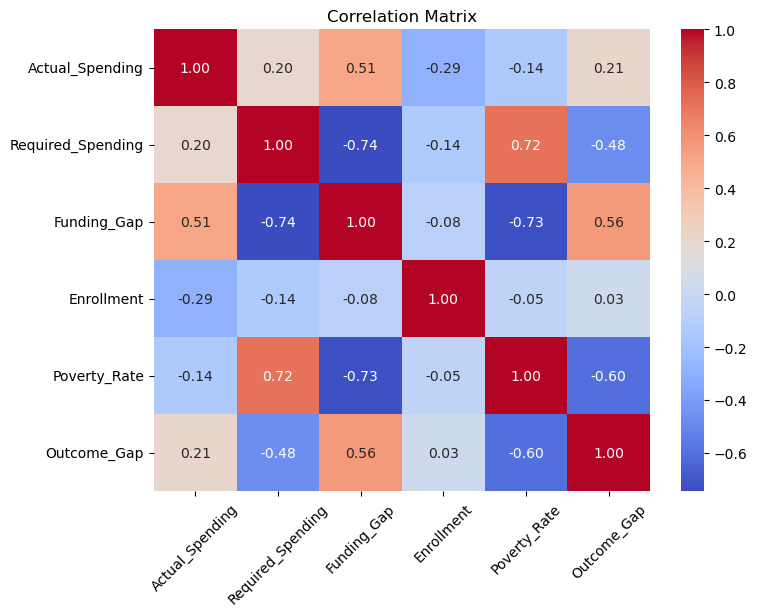

In [614]:
# Visualize the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

# **3. Model Development**
### Title: Linear Regression Model
- **Features Used**: `Actual_Spending`, `Funding_Gap`, `Poverty_Rate`.
- **Target Variable**: `Outcome_Gap`.
- **Training Process**:
  - Fitted a linear regression model to the training data.
  - Evaluated the model using Mean Absolute Error (MAE) for both training and testing sets.

In [617]:
# Assign X and y variables
feature_columns = ['Actual_Spending', 'Funding_Gap', 'Poverty_Rate']
X = df[feature_columns]
y = df['Outcome_Gap']

In [619]:
# Split data into test/train set (70/30 split) and shuffle
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, 
    shuffle=True
)

In [621]:
# Assign algorithm
model = LinearRegression()

# Link algorithm to X and y variables
model.fit(X_train, y_train)

LinearRegression()

In [623]:
# Find y_intercept
print(model.intercept_)

0.17521686747994716


In [625]:
# Find X coefficients
print(model.coef_)

[ 9.62958891e-07  1.32482956e-05 -1.45000760e+00]


In [627]:
# Evaluation of the model performance
mae_train = mean_absolute_error(y_train, model.predict(X_train))
print(f"Training Error: {mae_train:.2f}")

mae_test = mean_absolute_error(y_test, model.predict(X_test))
print(f"Testing Error: {mae_test:.2f}")

Training Error: 0.21
Testing Error: 0.21


**Observations:**
- Consistent training and testing errors suggest no overfitting or underfitting.
- Moderate predictive accuracy highlights the linear relationship between features and `Outcome_Gap`.

# **4. Testing the Model**
### Title: Predicting Outcome Gaps
- Created a small dataset to predict `Outcome_Gap` for five hypothetical districts.
- **Test Data**:
  - Range of funding gaps: from -5000 (underfunded) to 3000 (overfunded).
  - Varied poverty rates: from 5% to 25%.
  - Actual spending levels: from `$7,000` to `$16,000`.

In [631]:
# Create a DataFrame with test data points
test_data = pd.DataFrame({
    'Actual_Spending': [7000, 15000, 12000, 11000, 16000],
    'Funding_Gap': [-5000, 0, -1000, -2000, 3000],
    'Poverty_Rate': [0.25, 0.05, 0.10, 0.20, 0.15]
})

test_data

,Actual_Spending,Funding_Gap,Poverty_Rate
0,7000,-5000,0.25
1,15000,0,0.05
2,12000,-1000,0.10
3,11000,-2000,0.20
4,16000,3000,0.15


In [633]:
# Make prediction
predictions = model.predict(test_data)
print(predictions)

[-0.2467858   0.11716087  0.02852332 -0.1306887   0.01286796]


In [635]:
test_data['Predicted_Outcome_Gap'] = predictions
test_data

,Actual_Spending,Funding_Gap,Poverty_Rate,Predicted_Outcome_Gap
0,7000,-5000,0.25,-0.246786
1,15000,0,0.05,0.117161
2,12000,-1000,0.10,0.028523
3,11000,-2000,0.20,-0.130689
4,16000,3000,0.15,0.012868


**Observations:**
- Significant underfunding and high poverty rates lead to negative `Outcome_Gap` predictions.
- Surplus funding doesn't strongly influence positive outcomes without addressing poverty rates.

# **5. Model Interpretation**
**Observations:**
- `Poverty_Rate` has the strongest influence, with higher poverty leading to significantly worse outcomes.
- `Funding_Gap` contributes positively, but its impact is smaller than expected.
- `Actual_Spending` while it contributes positively to reducing outcome gaps, its impact is limited compared to addressing funding gaps or poverty rates.


# **6. Conclusions and Recommendations**
### Title: Addressing Disparities in Education
**Conclusions**:
- **Funding**: Districts with larger funding surpluses tend to have better outcomes, but poverty undermines these effects.
- **Poverty**: Reducing poverty rates could significantly improve student outcomes.

**Recommendations**:
1. **Arizona**:
   - Increase funding for underfunded districts.
   - Target poverty reduction programs in high-poverty areas.
2. **Maine**:
   - Maintain high funding levels and consider redistributing excess resources to support underperforming districts.
